In [201]:
import sympy
from sympy import Symbol

x = Symbol("x")
t = Symbol("t")
a = Symbol("a")
b = Symbol("b")

i = sympy.integrate(t**(a - 1) * (1-t)**(b-1), (t, 0, x))
i = i.simplify()
i

(-0**a + x**a*hyper((a, 1 - b), (a + 1,), x*exp_polar(2*I*pi)))/a

In [202]:
import numpy as np
from scipy.special import beta, betainc, gamma, hyp2f1, factorial, poch

In [203]:
a = 4.5
b = 0.5
x = 0.7
y = betainc(a, b, x)
y

np.float64(0.08112618884584057)

In [204]:
1 - betainc(b, a, 1 - x)

np.float64(0.08112618884584055)

In [205]:
x**a / a * hyp2f1(a, 1 - b, a + 1, x) / beta(a, b)

np.float64(0.08112618884584066)

In [206]:
x**a / a * sum(
    poch(a, n) * poch(1 - b, n) / poch(a + 1, n) * x**n / factorial(n)
    for n in range(90)
) / beta(a, b)

np.float64(0.08112618884584066)

In [207]:
x**a / a * sum(
    gamma(a + n) / gamma(a) * gamma(1 - b + n) / gamma(1 - b) / gamma(a + 1 + n) * gamma(a + 1) / factorial(n) * x**n 
    for n in range(90)
) / beta(a, b)

np.float64(0.08112618884584066)

In [208]:
x**a * gamma(a + 1) * gamma(a + b) / a / gamma(a)**2 / gamma(1 - b) / gamma(b) * sum(
    gamma(a + n) * gamma(1 - b + n) / gamma(a + 1 + n) * x**n / factorial(n)
    for n in range(90)
)

np.float64(0.0811261888458407)

In [209]:
gamma(a + b) / gamma(a) * np.sin(np.pi * b) / np.pi * x**a * sum(
    gamma(a + n) * gamma(1 - b + n) / gamma(a + 1 + n) / factorial(n) * x**n
    for n in range(90)
)

np.float64(0.0811261888458407)

In [210]:
gamma(a + b) / gamma(a) * np.sin(np.pi * b) / np.pi * x**a * sum(
    gamma(n + 1 - b) / gamma(n+1) / (a + n) * x**n
    for n in range(90)
)

np.float64(0.08112618884584069)

In [211]:
poch(a, b) * np.sin(np.pi * b) / np.pi * x**a * sum(
    poch(n + 1, -b) / (a + n) * x**n
    for n in range(90)
)

np.float64(0.08112618884584069)

In [216]:
poch(a, b) * np.sin(np.pi * b) / np.pi * sum(
    poch(n + 1, -b) / (a + n) * x**(a + n)
    for n in range(90)
)

np.float64(0.08112618884584061)

In [199]:
np.finfo(np.float64).eps / 2

np.float64(1.1102230246251565e-16)

In [244]:
def _betainc_approx(a, b, x, niter=200):
    m1 = poch(a, b) * np.sin(np.pi * b) / np.pi
    print(f"m1={m1}")
    def m2(n):
        res = poch(n + 1, -b) / (a + n)
        print(f"m2({n})={res}")
        return res

    return m1 * sum(m2(n) * x**(a + n) for n in range(niter))


def betainc_approx(a, b, x, niter=200):
    # The continued fraction will converge rapidly when x <
    # (a+1)/(a+b+2) as per: http://dlmf.nist.gov/8.17.E23.
    #
    # Otherwise, we can rewrite using the symmetry relation as per:
    # http://dlmf.nist.gov/8.17.E4
    converges_rapidly = x < (a + 1) / (a + b + 2)
    ar = np.where(converges_rapidly, a, b)
    br = np.where(converges_rapidly, b, a)
    xr = np.where(converges_rapidly, x, 1 - x)
    yr = _betainc_approx(ar, br, xr, niter)
    return np.where(converges_rapidly, yr, 1 - yr)

In [245]:
betainc(9, 0.5, 0.99)

np.float64(0.6748712326262112)

In [250]:
betainc_approx(9, 0.5, 0.99, niter=15)

m1=2.361247732613918e-11
m2(0)=inf
m2(1)=inf
m2(2)=inf
m2(3)=inf
m2(4)=inf
m2(5)=inf
m2(6)=inf
m2(7)=inf
m2(8)=inf
m2(9)=2.9007704446300937e-07
m2(10)=2.6245065927605612e-08
m2(11)=4.356888414859429e-09
m2(12)=1.0020843354176686e-09
m2(13)=2.854941126546065e-10
m2(14)=9.493030839500459e-11


array(-inf)

In [237]:
poch(9, 0.5), poch(0.5, 9), poch(201, -0.5), poch(201, -9)

(np.float64(2.958642410580579),
 np.float64(67303.564453125),
 np.float64(0.07066649779863662),
 np.float64(2.344415376406221e-21))

<Axes: >

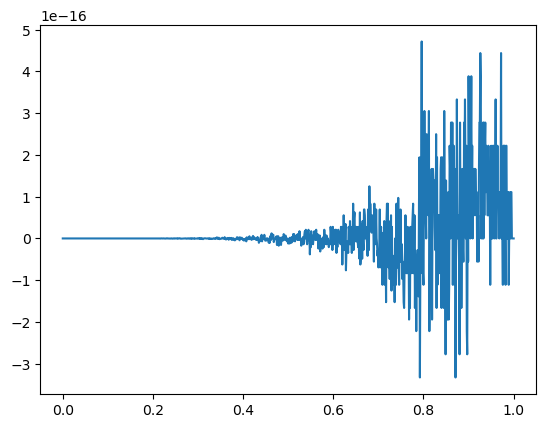

In [218]:
x = np.linspace(0, 1, 1001)
actual = betainc_approx(a, b, x, niter=200)
expect = betainc(a, b, x)

import pandas as pd
pd.Series(actual - expect, index=x).plot()

In [198]:
np.abs(actual - expect).max()

np.float64(3.885780586188048e-16)

In [56]:
bi = x**a * gamma(a + 1) * gamma(a + b) / a / gamma(a)**2 / gamma(1 - b) / gamma(b) * sum(
    gamma(-b + n + 1) / gamma(n + 1) / (a + n) * x**n
    for n in range(90)
)
bi

array([0.00000000e+00, 8.18384285e-15, 1.85255093e-13, ...,
       8.39384293e-01, 8.51234362e-01, 8.63475784e-01], shape=(1001,))

In [57]:
bi = x**a * np.sin(np.pi * b) * gamma(a + b) / gamma(a) / np.pi * sum(
    gamma(-b + n + 1) / (a + n) / gamma(n + 1) * x**n
    for n in range(90)
)
bi

array([0.00000000e+00, 8.18384285e-15, 1.85255093e-13, ...,
       8.39384293e-01, 8.51234362e-01, 8.63475784e-01], shape=(1001,))

In [ ]:
bi - y

In [ ]:
bi - betainc(a, b, x)

In [ ]:
(gamma(a + 1) * gamma(a + b) / a / gamma(a)**2 / gamma(1 - b) / gamma(b)).simplify()

In [141]:
x = Symbol("x")
n = Symbol("n")
a = Symbol("a")
b = Symbol("b")
from sympy import gamma, factorial, sin, pi
(gamma(a + n) * gamma(1 - b + n) / gamma(a + 1 + n) / factorial(n)).simplify()

gamma(-b + n + 1)/((a + n)*gamma(n + 1))

In [139]:
(gamma(a + b) / gamma(a) * sin(pi * b) / pi)

sin(pi*b)*gamma(a + b)/(pi*gamma(a))

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import scipy.special

jax.config.update("jax_enable_x64", True)

betainc = jax.jit(jax.scipy.special.betainc)
betainc.clear_cache()

a = 4.5
b = 0.5

columns = [
    "samples",
    "scipy", 
    "jax cpu (cold jit)",
    "jax cpu (warm jit)",
    "jax gpu (cold jit)",
    "jax gpu (warm jit)",
]
rows = []
for n in range(0, 8):
    x = np.random.uniform(0, 1, 10**n)
    jx_cpu = jnp.asarray(x, device=jax.devices("cpu")[0]).block_until_ready()
    jx_gpu = jnp.asarray(x, device=jax.devices("gpu")[0]).block_until_ready()
    t1 = %timeit -o -q -r 1 -n 1 scipy.special.betainc(a, b, x)
    t2 = %timeit -o -q -r 1 -n 1 betainc(a, b, jx_cpu).block_until_ready()  # cold JIT
    t3 = %timeit -o -q -r 1 -n 1 betainc(a, b, jx_cpu).block_until_ready()  # warm JIT
    t4 = %timeit -o -q -r 1 -n 1 betainc(a, b, jx_gpu).block_until_ready()  # cold JIT
    t5 = %timeit -o -q -r 1 -n 1 betainc(a, b, jx_gpu).block_until_ready()  # warm JIT
    rows.append([10**n,t1.average,t2.average,t3.average,t4.average,t5.average])

In [ ]:
df = pd.DataFrame(rows, columns=columns).set_index("samples")
df

In [ ]:
(df * 1000).plot(logx=True, logy=True, grid=True, ylabel="ms")

In [ ]:
@jax.jit
def betainc2(a, b, x):
    return x**a * jax.scipy.special.hyp2f1(a, 1 - b, a + 1, x) / a / jax.scipy.special.beta(a, b)

beta = jax.jit(jax.scipy.special.beta)
hyp2f1 = jax.jit(jax.scipy.special.hyp2f1)
beta.clear_cache()
hyp2f1.clear_cache()

%timeit -n 1 -r 1 betainc(a, b, jx_gpu)
%timeit -n 1 -r 1 actual = jx_gpu**a * hyp2f1(a, 1 - b, a + 1, jx_gpu) / a / beta(a, b)
desired = betainc(a, b, x)

In [ ]:
pandas.Series(actual - desired, index=x).sort_index().plot()